# Civilization 6 Players
# Descriptive Statistics Analysis 
# Author: Lu (Christina) Jin

# Setup: Import all libraries

In [148]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as scipy

import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [21]:
# Read data
civ6_players_path = r'C:\Users\Lu_ki\OneDrive - Northeastern University\NU Master Courseworks\ALY6050\Course Materials\Module 1\M1 Project 1\civ6_players.xlsx'
civ6_players = pd.read_excel(civ6_players_path)
civ6_players

,PLAYERID,INSTALLDATE,ACTIVEDAYS,LASTACTIVEDAY,LEADERMOSTSELECTED,CIVILIZATIONMOSTSELECTED,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
0,3316379,2018-01-05,1,2018-01-05,LEADER_GILGAMESH,CIVILIZATION_SUMERIA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,3316386,2018-01-05,3,2018-01-09,LEADER_TRAJAN,CIVILIZATION_ROME,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3316394,2018-01-05,115,2018-07-08,LEADER_T_ROOSEVELT,CIVILIZATION_AMERICA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,3888460,2018-03-04,112,2019-10-05,LEADER_HOJO,CIVILIZATION_JAPAN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,3940600,2018-03-12,1,2018-03-12,LEADER_PALA,CIVILIZATION_PALA,NaT,NaT,2018-03-12,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2969114,2017-11-12,11,2019-06-06,LEADER_CLEOPATRA,CIVILIZATION_EGYPT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499996,2945770,2017-11-04,2,2018-02-05,LEADER_BARBAROSSA,CIVILIZATION_GERMANY,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499997,2945778,2017-11-04,4,2017-11-11,LEADER_QIN,CIVILIZATION_CHINA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499998,3309420,2018-01-04,6,2018-01-11,LEADER_VICTORIA,CIVILIZATION_ENGLAND,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [22]:
civ6_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PLAYERID                  500000 non-null  int64         
 1   INSTALLDATE               500000 non-null  datetime64[ns]
 2   ACTIVEDAYS                500000 non-null  int64         
 3   LASTACTIVEDAY             500000 non-null  datetime64[ns]
 4   LEADERMOSTSELECTED        500000 non-null  object        
 5   CIVILIZATIONMOSTSELECTED  500000 non-null  object        
 6   POLAND                    44665 non-null   datetime64[ns]
 7   NUBIA                     29385 non-null   datetime64[ns]
 8   KHMER_AND_INDONESIA       26678 non-null   datetime64[ns]
 9   GATHERING_STORM           68484 non-null   datetime64[ns]
 10  PERSIA_AND_MACEDON        60841 non-null   datetime64[ns]
 11  VIKINGS                   18670 non-null   datetime64[ns]
 12  RI

# Q1: How many unique players are playing CIV 6?

In [23]:
civ6_players['PLAYERID'].unique()

array([3316379, 3316386, 3316394, ..., 2945778, 3309420, 2945794],
      dtype=int64)

In [71]:
n = len(pd.unique(civ6_players['PLAYERID'])) 
  
print("Number of unique players is :", n)

Number of unique players is : 500000


# Q2: What is the average active day per players?

In [70]:
avg_day = civ6_players['ACTIVEDAYS'].mean()
print("Average active days is :", avg_day)

Average active days is : 23.5908


# Q3: How many DLCs or Expansion packs each player has in average?

In [33]:
DLC_EP_df = civ6_players[["POLAND","NUBIA","KHMER_AND_INDONESIA","GATHERING_STORM",
                         "PERSIA_AND_MACEDON", "VIKINGS", "RISE_AND_FALL","AUSTRALIA"]]
DLC_EP_df

,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,NaT,NaT,2018-03-12,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
499995,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499996,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499997,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499998,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [69]:
DLC_EP = DLC_EP_df.count(axis='columns')
avg_DLC_EP = DLC_EP.mean()
print("Average DLC or Expansion packs per player is :", avg_DLC_EP)

Average DLC or Expansion packs per player is : 0.76108


# Q4: If I select a player randomly from this set of players what is the probability of the player's having all the DLCs and Expansion packs?

In [74]:
all_DLC_EP = sum(DLC_EP == 8)
total = len(DLC_EP)
all_DLC_EP_prob = round((all_DLC_EP/total)*100,4)
print("Probability of selecting a player having all DLCs and Expansion packs is :", all_DLC_prob,"%")

Probability of selecting a player having all DLCs and Expansion packs is : 0.2508 %


# Q5: If I randomly select a player from this set of players what is the probability of the player's having POLAND DLC?

In [67]:
POLAND_DLC = DLC_EP_df['POLAND'].count()
total = len(DLC_EP_df)
POLAND_DLC_prob = round((POLAND_DLC/total)*100,4)
print("Probability of selecting a player having POLAND DLC is :", POLAND_DLC_prob,"%")

Probability of selecting a player having POLAND DLC is : 8.933 %


# Q6: Given that a player has "RISE AND FALL" what is the probability of this player's having "GATHERING STORM"

In [72]:
RISE_FALL_df = DLC_EP_df[DLC_EP_df['POLAND'].notna()]
GATHERING_STORM = RISE_FALL_df['GATHERING_STORM'].count()
total = len(RISE_FALL_df)
GATHERING_STORM_prob = round((GATHERING_STORM/total)*100,4)
print("Given that a player has 'RISE AND FALL' DLC, the probability of getting one with 'GATHERING STORM' DLC is :", GATHERING_STORM_prob,"%")

Given that a player has 'RISE AND FALL' DLC, the probability of getting one with 'GATHERING STORM' DLC is : 29.8601 %


# Q7: What is the probability of a player's purchasing all DLCs but not purchasing any expansion packs?

In [86]:
DLC_df1 = DLC_EP_df[DLC_EP_df['POLAND'].notna()]
DLC_df2 = DLC_df1[DLC_df1['NUBIA'].notna()]
DLC_df3 = DLC_df2[DLC_df2['KHMER_AND_INDONESIA'].notna()]
DLC_df4 = DLC_df3[DLC_df3['PERSIA_AND_MACEDON'].notna()]
DLC_df5 = DLC_df4[DLC_df4['VIKINGS'].notna()]
DLC_df6 = DLC_df5[DLC_df5['AUSTRALIA'].notna()]
DLC_df6

,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
197,2017-06-26,2017-06-26,2017-06-26,2019-07-03,2017-06-26,2017-06-26,2019-01-01,2017-06-26
236,2018-05-25,2018-05-25,2018-05-25,NaT,2018-05-25,2018-05-25,NaT,2018-05-25
382,2017-06-26,2017-06-26,2017-06-26,NaT,2017-06-26,2017-06-26,2018-06-26,2017-06-26
604,2017-06-26,2017-06-26,2017-06-26,2019-02-14,2017-06-26,2017-06-26,2018-02-09,2017-06-26
916,2017-06-26,2017-06-26,2017-06-26,2019-02-15,2017-06-26,2017-06-26,2018-03-22,2017-06-26
...,...,...,...,...,...,...,...,...
499236,2018-01-02,2018-01-02,2018-01-02,NaT,2018-01-02,2018-01-02,NaT,2018-01-02
499315,2018-01-02,2018-01-02,2018-01-02,NaT,2018-01-02,2018-01-02,2018-09-02,2018-01-02
499396,2017-11-16,2017-11-16,2017-11-16,NaT,2017-11-16,2017-11-16,NaT,2017-11-16
499565,2017-11-03,2017-11-03,2017-11-03,NaT,2017-11-03,2017-11-03,NaT,2017-11-03


In [98]:
all_DLC_no_EP = sum(DLC_df6.count(axis='columns')==6)
total = len(DLC_df6)
all_DLC_no_EP_prob = round((all_DLC_no_EP/total)*100,5)
print("Probability of a player purchasing all DLCs but no Expansion packs is :", all_DLC_no_EP_prob,"%")

Probability of a player purchasing all DLCs but no Expansion packs is : 20.72743 %


# Q8: Plot the histogram of number of active days.

In [102]:
civ6_players['ACTIVEDAYS'].max()

1081

Text(0.5, 1.0, 'Histogram of Player Active Days \n')

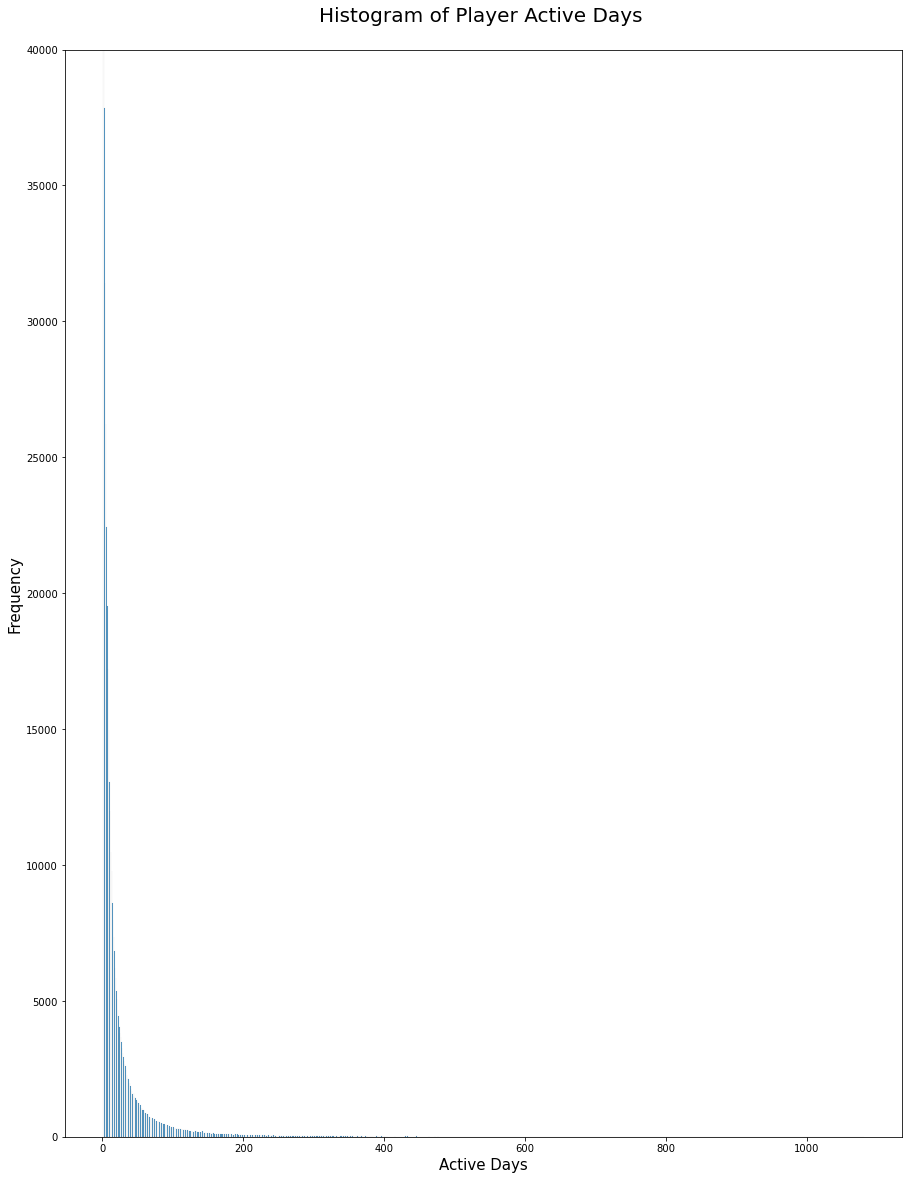

In [144]:
plt.figure(figsize=(15,20))
ax = sns.histplot(data=civ6_players['ACTIVEDAYS'])
plt.xlabel("Active Days", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
ax.set(ylim=(0,40000.0))
plt.title("Histogram of Player Active Days \n", fontsize=20)